<h1>Problema OneMax<h1>

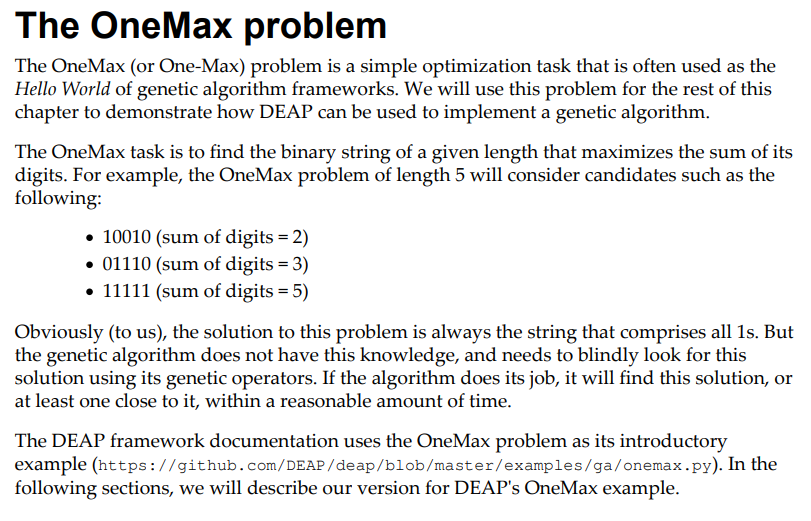

<h1>Baixando as bibliotecas<h1>



In [2]:
!pip install deap
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 11.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h1>Genetic Algorithms<h1>

In [9]:
from deap import creator, base, tools, algorithms
import matplotlib.pyplot as plt
import random as rd
import numpy as np


# STRUCTURE
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("chromosomeStructure", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()


# CHROMOSOME AND POPULATION
def gene():
  g = rd.randint(0,1)
  return g
CHROMOSOME_LENGTH = 10
toolbox.register("gene", gene)
toolbox.register("chromosome", tools.initRepeat, creator.chromosomeStructure, toolbox.gene, CHROMOSOME_LENGTH)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.chromosome)


# GENETIC OPERATORS
def fitness_function(individual):
  return sum(individual), # Precisa retornar uma tupla para ser armazenado na classe FITNESS
toolbox.register("evaluate", fitness_function)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/CHROMOSOME_LENGTH) 


# STORING INFORMATIONS
def getting_statistics_of_all_individuals(individual):
  return individual.fitness.values
estatistica = tools.Statistics(getting_statistics_of_all_individuals)
estatistica.register('mean', np.mean)
estatistica.register('min', np.min)
estatistica.register('max', np.max)
def porcentagem(fitness_values):
  maximo = max(fitness_values)
  return int(maximo[0])/CHROMOSOME_LENGTH
estatistica.register("porcent_of_the_best_solution", porcentagem)
hof = tools.HallOfFame(3) # hall da fama


# PAINEL DE CONTROLE
POPULATION_SIZE = 4
PROBABILITY_CROSSOVER = 0.9
PROBABILITY_MUTATION = 0.1
MAX_GENERATIONS = 10 # (stopping condition)
#rd.seed(42)

# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, log = algorithms.eaSimple(population,
                                  toolbox,
                                  cxpb=PROBABILITY_CROSSOVER,
                                  mutpb=PROBABILITY_MUTATION,
                                  stats=estatistica,
                                  ngen=MAX_GENERATIONS,
                                  halloffame=hof,
                                  verbose=True)

gen	nevals	mean	min	max	porcent_of_the_best_solution
0  	4     	4   	3  	6  	0.6                         
1  	2     	5.5 	4  	6  	0.6                         
2  	4     	5.75	5  	6  	0.6                         
3  	4     	5.75	5  	6  	0.6                         
4  	4     	6   	6  	6  	0.6                         
5  	4     	6   	6  	6  	0.6                         
6  	4     	5.5 	4  	6  	0.6                         
7  	4     	6   	6  	6  	0.6                         
8  	4     	6   	6  	6  	0.6                         
9  	4     	5.5 	4  	6  	0.6                         
10 	3     	6.25	6  	7  	0.7                         


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'chromosomeStructure' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


<h1>Resultados<h1>

In [10]:
print(sorted(result, key=lambda x: sum(x), reverse=True)) # Individuos da ultima geração

[[1, 0, 1, 1, 1, 0, 1, 1, 1, 0], [1, 0, 1, 0, 1, 0, 1, 1, 1, 0], [1, 0, 1, 0, 1, 0, 1, 1, 1, 0], [1, 0, 1, 0, 1, 0, 1, 1, 1, 0]]


In [11]:
print(hof) # hall da fama dos 3 melhores individuos de todas as gerações

[[1, 0, 1, 1, 1, 0, 1, 1, 1, 0], [1, 0, 1, 0, 1, 0, 1, 1, 1, 0], [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]]


In [12]:
print(fitness_function(hof[0]))

(7,)


In [13]:
print(log)

gen	nevals	mean	min	max	porcent_of_the_best_solution
0  	4     	4   	3  	6  	0.6                         
1  	2     	5.5 	4  	6  	0.6                         
2  	4     	5.75	5  	6  	0.6                         
3  	4     	5.75	5  	6  	0.6                         
4  	4     	6   	6  	6  	0.6                         
5  	4     	6   	6  	6  	0.6                         
6  	4     	5.5 	4  	6  	0.6                         
7  	4     	6   	6  	6  	0.6                         
8  	4     	6   	6  	6  	0.6                         
9  	4     	5.5 	4  	6  	0.6                         
10 	3     	6.25	6  	7  	0.7                         


<h1>Visualizações<h1>

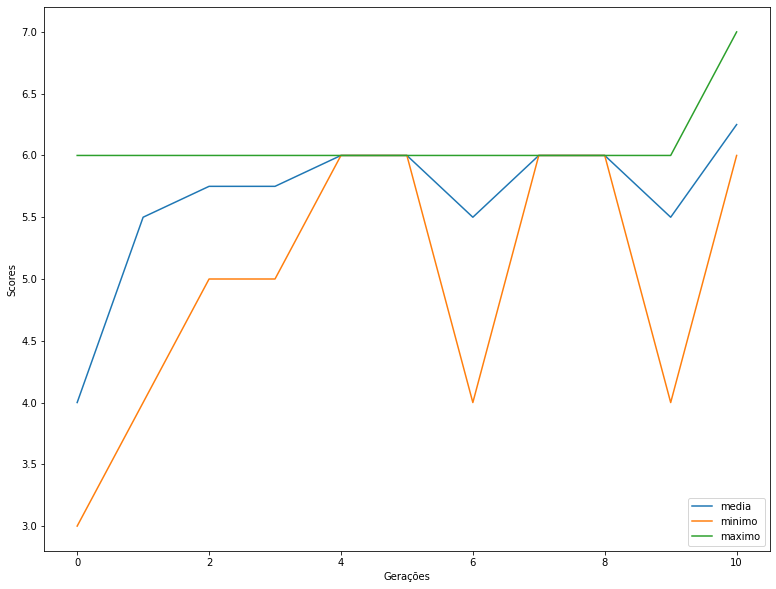

In [14]:
# taking data
y_mean = log.select("mean")
y_min = log.select("min")
y_max = log.select("max")
x_gen = log.select("gen")

#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
plt.plot(x_gen, y_max, label="maximo")

plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=4)

<h1>O problema termina aqui. Agora irei testar resolver o mesmo problema com o cromossomo bem maior e mais gerações<h1>

In [19]:
# STRUCTURE
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("chromosomeStructure", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()


# CHROMOSOME AND POPULATION
def gene():
  g = rd.randint(0,1)
  return g
CHROMOSOME_LENGTH = 400
toolbox.register("gene", gene)
toolbox.register("chromosome", tools.initRepeat, creator.chromosomeStructure, toolbox.gene, CHROMOSOME_LENGTH)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.chromosome)


# GENETIC OPERATORS
def fitness_function(individual):
  return sum(individual), # Precisa retornar uma tupla para ser armazenado na classe FITNESS
toolbox.register("evaluate", fitness_function)
toolbox.register("select", tools.selTournament, tournsize=25)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1/CHROMOSOME_LENGTH) 


# STORING INFORMATIONS
def getting_statistics_of_all_individuals(individual):
  return individual.fitness.values
estatistica = tools.Statistics(getting_statistics_of_all_individuals)
estatistica.register('mean', np.mean)
estatistica.register('min', np.min)
estatistica.register('max', np.max)
def porcentagem(fitness_values):
  maximo = max(fitness_values)
  return int(maximo[0])/CHROMOSOME_LENGTH
estatistica.register("porcent_of_the_best_solution", porcentagem)
hof = tools.HallOfFame(3) # hall da fama


# PAINEL DE CONTROLE
POPULATION_SIZE = 100
PROBABILITY_CROSSOVER = 1
PROBABILITY_MUTATION = 0.2
MAX_GENERATIONS = 300 # (stopping condition)
#rd.seed(42)

# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, log = algorithms.eaSimple(population,
                                  toolbox,
                                  cxpb=PROBABILITY_CROSSOVER,
                                  mutpb=PROBABILITY_MUTATION,
                                  stats=estatistica,
                                  ngen=MAX_GENERATIONS,
                                  halloffame=hof,
                                  verbose=True)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'chromosomeStructure' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	mean  	min	max	porcent_of_the_best_solution
0  	100   	200.09	177	223	0.5575                      
1  	100   	218.96	203	232	0.58                        
2  	100   	229.46	219	242	0.605                       
3  	100   	236.23	225	248	0.62                        
4  	100   	245.68	237	251	0.6275                      
5  	100   	249.83	245	255	0.6375                      
6  	100   	253.37	251	256	0.64                        
7  	100   	255.35	253	257	0.6425                      
8  	100   	256.88	255	258	0.645                       
9  	100   	257.32	256	259	0.6475                      
10 	100   	258.14	256	260	0.65                        
11 	100   	259.43	257	260	0.65                        
12 	100   	259.92	258	261	0.6525                      
13 	100   	260.79	259	262	0.655                       
14 	100   	261.89	260	264	0.66                        
15 	100   	263.34	261	267	0.6675                      
16 	100   	265.06	262	267	0.6675                      
17 	100   

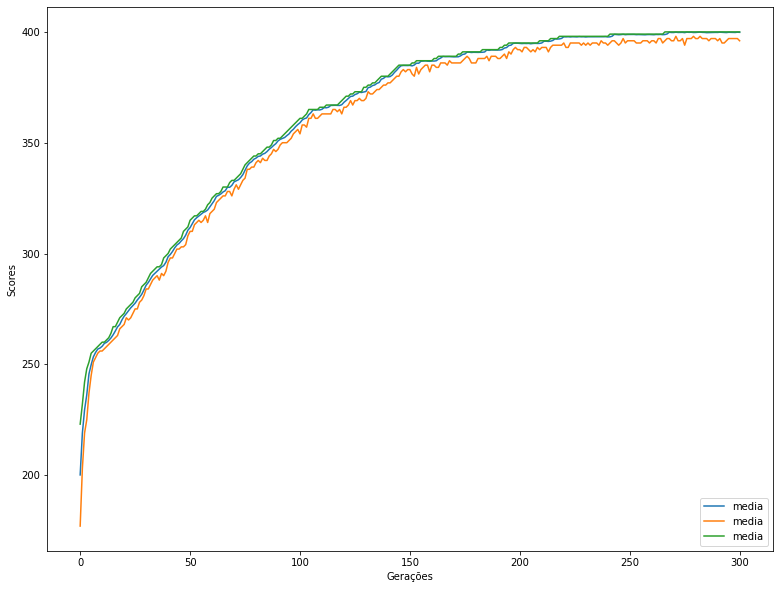

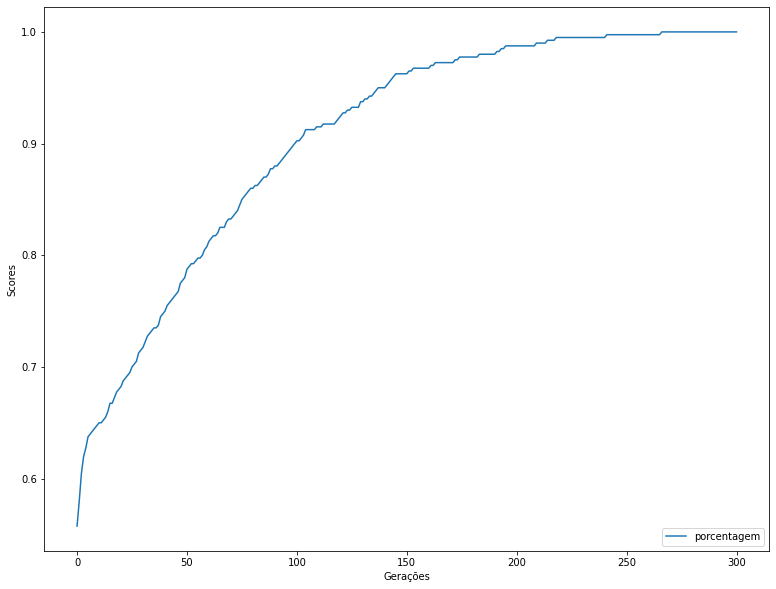

In [21]:
# taking data
y_porcent = log.select("porcent_of_the_best_solution")
y_mean = log.select("mean")
y_min = log.select("min")
y_max = log.select("max")
x_gen = log.select("gen")

#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="media")
plt.plot(x_gen, y_max, label="media")

plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=4)

#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_porcent, label="porcentagem")
plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=4)